## Stock Price Prediction

Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')

In [5]:
data = pd.read_csv('Stock_Price_data_set.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [6]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

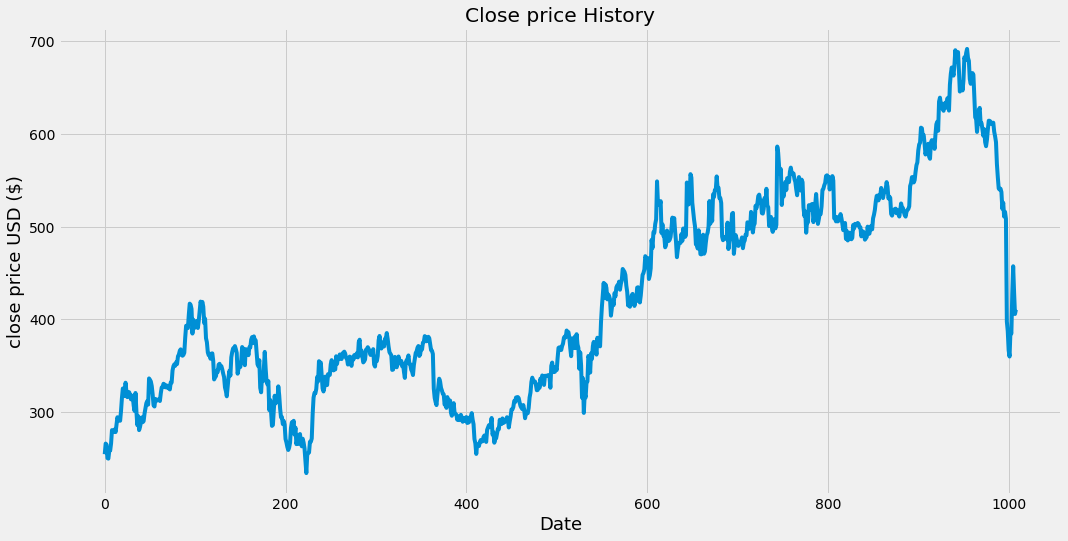

In [7]:
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD ($)', fontsize=18)
plt.show()

In [8]:
dataset=data.filter(['Close'])
dat=dataset.values
training_data_len = math.ceil(len(dat) * .8)

training_data_len

808

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dat)

scaled_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [10]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09667768, 0.11369343, 0.13167034,
       0.12391599, 0.12559796, 0.12343551, 0.14672022, 0.1771914 ,
       0.19951508, 0.19064677, 0.18156003, 0.2131015 , 0.19095254,
       0.17911361, 0.19149862, 0.19049385, 0.18472731, 0.17387127,
       0.18265218, 0.18042421, 0.15906164, 0.14647998, 0.18887749,
       0.1459339 , 0.11334393, 0.13426968, 0.10137394, 0.10875693,
       0.12026823, 0.13125532, 0.12007165, 0.12243068, 0.14021101,
       0.15244317, 0.16463161, 0.16987394, 0.16142066, 0.22319301,
       0.21982915, 0.21585376, 0.20508505, 0.18525152, 0.15976057,
       0.15700838, 0.17496343, 0.17011425, 0.17164323, 0.17347804])]
[0.17360909661393875]



In [11]:
train_data.shape

(808, 1)

In [12]:
x_train, y_train = np.array(x_train),np.array(y_train)

In [13]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(748, 60, 1)

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [16]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

748/748 [==============================] - 66s 12ms/step - loss: 0.0046


In [17]:
test_data = scaled_data[training_data_len - 60: , :]
x_test=[]
y_test=dat[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [18]:
x_test = np.array(x_test)

In [19]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [20]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 3s 28ms/step


In [21]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

22.05637793915189

C:\Users\CHAITANYA DA\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


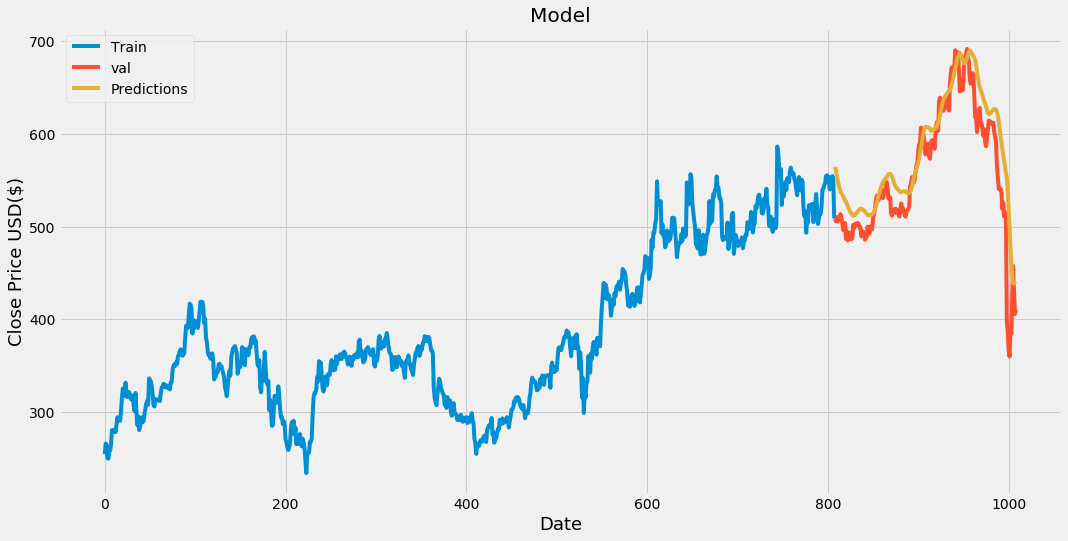

In [22]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','val','Predictions'])
plt.show()

In [23]:
valid

,Date,Open,High,Low,Close,Adj Close,Volume,Predictions
808,2021-04-22,513.820007,513.960022,500.549988,508.779999,508.779999,9061100,564.318970
809,2021-04-23,509.010010,509.700012,500.700012,505.549988,505.549988,7307700,559.709534
810,2021-04-26,506.760010,510.480011,503.000000,510.299988,510.299988,4388800,554.366150
811,2021-04-27,512.619995,512.989990,504.579987,505.549988,505.549988,3761300,549.505005
812,2021-04-28,505.200012,508.399994,503.339996,506.519989,506.519989,3193000,544.880981
...,...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,446.662872
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,439.250977
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,438.448120
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,438.933441
